# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [138]:
import pandas as pd# Cargar todas las librerías
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [139]:
llamadas=pd.read_csv("/datasets/megaline_calls.csv",sep=",")# Carga los archivos de datos en diferentes DataFrames
datos=pd.read_csv("/datasets/megaline_internet.csv",sep=",")
mensajes=pd.read_csv("/datasets/megaline_messages.csv",sep=",")
planes =pd.read_csv("/datasets/megaline_plans.csv", sep=",")
usuario=pd.read_csv("/datasets/megaline_users.csv",sep=",")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [140]:
planes.info()# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [141]:
planes# Imprime una muestra de los datos para las tarifas



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
 En la tabla de datos veo que hay 2 columnas de float es decir decimales y los datos del mes esta en megabytes

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [142]:
planes["mb_per_month_included"]=planes["mb_per_month_included"]/1024 # convertir de mb a gb
planes = planes.rename(columns={"mb_per_month_included": "gb_per_month_included"})# cambiar nombre la columna
planes

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [143]:
planes.rename(columns={"plan_name": "plan_id"}, inplace=True)# cambiar el nombre de la columa a plan id ya que varios dataframent tendra algo en comun con el nombre
planes

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [144]:
usuario.info()# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [145]:
usuario# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El id del usuario se podría convertir a objecto ya que está en número y también es normal que haya valores ausentes en la columna "churn" pero lo ideal es ponerlo vacio ya que no hay ningun dato por lo otro en la informacion general nos muestra que solo 34 dejaron de usar la tarifa cuando fue extraida la base datos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [146]:
usuario=usuario.rename( columns={"plan":"plan_id"})# convertir el id de usuario a objecto ya que no se hara ninguna operacion
usuario

,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [147]:
usuario["churn_date"].fillna("",inplace=True)
usuario

,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,


## Llamadas

In [148]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
llamadas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [149]:
llamadas# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Vemos que el id de usuario esta en enteros por el cual se convertira en objecto y la duracion de llamadas esta en minutos pero en decimales por el cual se debe redondear y considerarse los minutos enteros.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [150]:
llamadas["duration"]=np.ceil(llamadas["duration"]).astype(int) # redondear los minutos a enteros al valor maximo segun la indicacion
llamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [151]:
llamadas["call_date"]=pd.to_datetime(llamadas["call_date"],format='%Y-%m-%d' ) # cambiar a fecha la columna con datos de fecha 
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [152]:
llamadas["mes"]=pd.DatetimeIndex(llamadas["call_date"]).month # de la columna de dato fecha sacar el indice del mes para crear otra columna porque se utilizará
llamadas

,id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


## Mensajes

In [153]:
mensajes.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [154]:
mensajes# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Que la fecha no esta a objecto y no a dato de fecha

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [155]:
mensajes["message_date"]=pd.to_datetime(mensajes["message_date"],format='%Y-%m-%d')# covertir a columna fecha
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [156]:
mensajes["mes"]=pd.DatetimeIndex(mensajes["message_date"]).month # crear columna mes
mensajes

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [157]:
# Imprime la información general/resumida sobre el DataFrame de internet
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [158]:
datos# Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

 Cambiar el ID de usuario por texto y convertir el volumen de datos en gigabites

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [159]:
datos["session_date"]= pd.to_datetime(datos["session_date"],format='%Y-%m-%d')# covertir a columna fecha
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [160]:
datos["mes"]=pd.DatetimeIndex(datos["session_date"]).month# crear columna mes
datos

,id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [161]:
planes# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [162]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
call_cant_usuario=llamadas.groupby(["user_id","mes"])["id"].count().reset_index()
call_cant_usuario=call_cant_usuario.rename(columns={"id":"total de llamadas"})
call_cant_usuario                                       

,user_id,mes,total de llamadas
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [163]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
call_duracion_usuario=llamadas.groupby(["user_id","mes"])["duration"].sum().reset_index()
call_duracion_usuario=call_duracion_usuario.rename(columns={"duration":"total de duracion"})
call_duracion_usuario 

,user_id,mes,total de duracion
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [164]:
call_cant_min=call_cant_usuario.merge(call_duracion_usuario , on=["user_id","mes"], how="outer")
call_cant_min

,user_id,mes,total de llamadas,total de duracion
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [165]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_cant_usuario=mensajes.groupby(["user_id","mes"])["id"].count().reset_index()
mensajes_cant_usuario=mensajes_cant_usuario.rename(columns={"id":"total de mensajes"})
mensajes_cant_usuario

,user_id,mes,total de mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [166]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

datos_total_usuario=datos.groupby(["user_id","mes"])["mb_used"].sum().reset_index()
datos_total_usuario=datos_total_usuario.rename(columns={"mb_used":"total de datos en mb"})
datos_total_usuario["total de datos en gb"]=np.ceil(datos_total_usuario["total de datos en mb"]/1024)
datos_total_usuario

,user_id,mes,total de datos en mb,total de datos en gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [167]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
llamadas_y_mensajes = call_cant_min.merge(mensajes_cant_usuario, on=["user_id","mes"],how="outer")
llamadas_y_mensajes_datos=llamadas_y_mensajes.merge(datos_total_usuario, on=["user_id","mes"],how="outer")
llamadas_y_mensajes_datos

,user_id,mes,total de llamadas,total de duracion,total de mensajes,total de datos en mb,total de datos en gb
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [168]:
# Añade la información de la tarifa
consumo_usuario=llamadas_y_mensajes_datos.merge(usuario[["user_id","plan_id","reg_date","city"]], on="user_id", how="inner")
consumo_usuario # se une las 2 dataframes 

,user_id,mes,total de llamadas,total de duracion,total de mensajes,total de datos en mb,total de datos en gb,plan_id,reg_date,city
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,2018-12-24,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,36.0,ultimate,2018-08-20,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
2289,1349,10,NaN,NaN,76.0,13093.55,13.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA"
2290,1349,11,NaN,NaN,72.0,17128.26,17.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA"
2291,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA"


In [169]:
total_consumo_plan=consumo_usuario.merge(planes,on="plan_id", how="left")# juntar con el dataframes de planes 
total_consumo_plan.fillna(0 ,inplace=True)
total_consumo_plan 

,user_id,mes,total de llamadas,total de duracion,total de mensajes,total de datos en mb,total de datos en gb,plan_id,reg_date,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,2018-12-24,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,36.0,ultimate,2018-08-20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30.0,3000,70,7,0.01,0.01
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [170]:
# Calcula el ingreso mensual para cada usuario
def rentabilidad_mensual(fila):# crear funcion para la creacion de la columna de ingreso
    ingreso_mensual_usuario= 0 

    ingreso_mensajes=0
    ingreso_datos=0
    ingreso_llamadas=0

    if fila["total de duracion"]>fila["minutes_included"]:
        ingreso_llamadas=(fila["total de duracion"]-fila["minutes_included"])*fila["usd_per_minute"]
    if fila["total de mensajes"]>fila["messages_included"]:
        ingreso_mensajes=(fila["total de mensajes"]-fila["messages_included"])*fila["usd_per_message"]
    if fila["total de datos en gb"]>fila["gb_per_month_included"]:
        ingreso_datos=(fila["total de datos en gb"]-fila["gb_per_month_included"])*fila["usd_per_gb"]

    ingreso_mensual_usuario= fila["usd_monthly_pay"]+ ingreso_mensajes + ingreso_datos + ingreso_llamadas

    return ingreso_mensual_usuario




In [171]:
total_consumo_plan["ingreso_mensual"]=total_consumo_plan.apply(rentabilidad_mensual, axis=1)# se crea la columna de ingreso utilizando apply
total_consumo_plan

,user_id,mes,total de llamadas,total de duracion,total de mensajes,total de datos en mb,total de datos en gb,plan_id,reg_date,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,ingreso_mensual
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,2018-12-24,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01,70.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,20.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,20.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,90.09
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,2018-08-13,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,36.0,ultimate,2018-08-20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30.0,3000,70,7,0.01,0.01,112.00
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,2018-10-01,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03,20.33


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

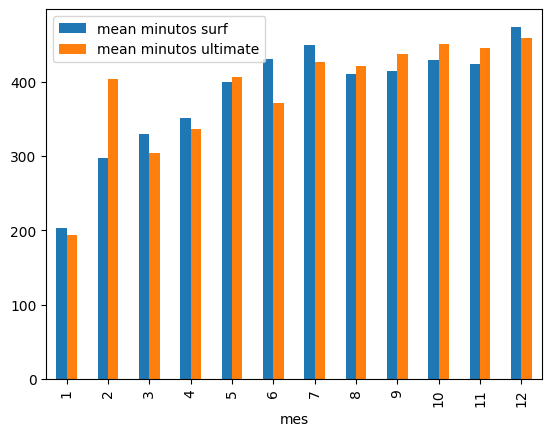

In [172]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
surf_plan= total_consumo_plan.query('plan_id=="surf"')
ultimate_plan=total_consumo_plan.query('plan_id=="ultimate"')
surf_promedio_llamadas=surf_plan.pivot_table(values="total de duracion",index="mes" ,aggfunc="mean").rename(columns={"total de duracion":"mean minutos surf"})
ultimate_promedio_llamadas=ultimate_plan.pivot_table(values="total de duracion",index="mes" ,aggfunc="mean").rename(columns={"total de duracion":"mean minutos ultimate"})
plan_promedio_llamadas=pd.merge(surf_promedio_llamadas,ultimate_promedio_llamadas, on="mes").reset_index()
plan_promedio_llamadas.plot(x="mes", kind="bar")
plt.show()

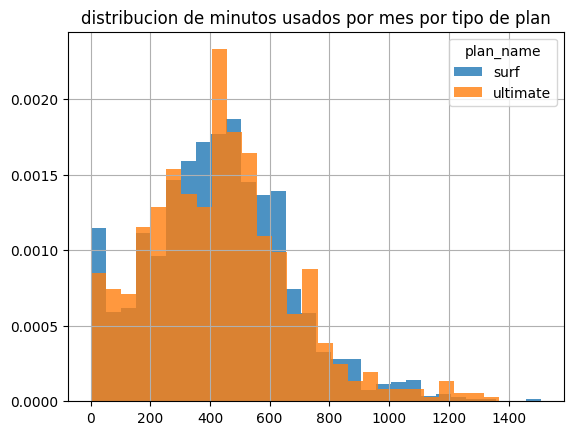

In [173]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_duracion_mensual=surf_plan["total de duracion"]
ultimate_duracion_mensual=ultimate_plan["total de duracion"]
surf_duracion_mensual.hist(ax=plt.gca(),label="surf",alpha=0.8, density=True, bins=30)
ultimate_duracion_mensual.hist(ax=plt.gca(),label="ultimate", alpha=0.8, density=True,bins=27)
plt.legend(title="plan_name")
plt.title("distribucion de minutos usados por mes por tipo de plan")
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [174]:
#1 la media
media_llamada=total_consumo_plan.groupby("plan_id")["total de duracion"].mean()
media_llamada

plan_id
surf        428.749523
ultimate    430.450000
Name: total de duracion, dtype: float64

Vemos que no hay mucha diferencia con los promedio de los minutos de ambos planes

In [175]:
#2.varianza
varianza_llamadas_surf=np.var(surf_duracion_mensual)
varianza_llamadas_ultimate=np.var(ultimate_duracion_mensual)
varianza_llamadas_surf,varianza_llamadas_ultimate


(54933.334591317485, 57764.125277777785)

tampoco hay mucho dispersion entre los minutos mensuales de los usuarios de ambos planes

<AxesSubplot:xlabel='total de duracion'>

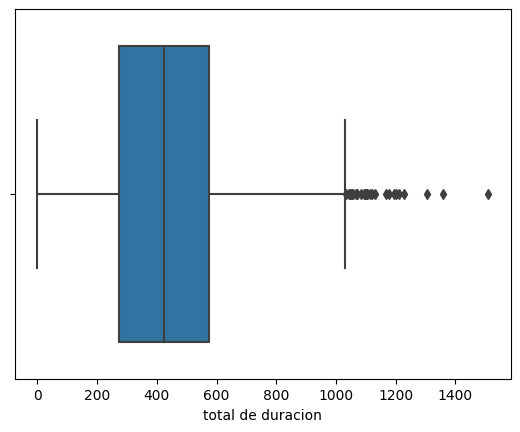

In [176]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# caja de surf de la duracion de llamadas
sns.boxplot(surf_duracion_mensual)

In [177]:
surf_duracion_mensual.describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: total de duracion, dtype: float64

<AxesSubplot:xlabel='total de duracion'>

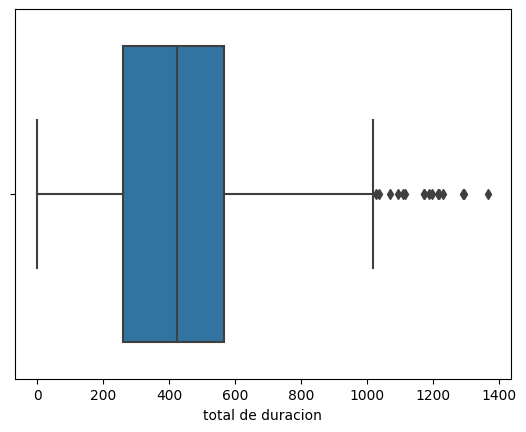

In [178]:
sns.boxplot(ultimate_duracion_mensual)

In [179]:
ultimate_duracion_mensual.describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: total de duracion, dtype: float64

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

En la distribucion de los promedios no varia los promedios de minutos usados en cada mes
En caso del histograma y caja se detalla los siguientes
1.vemos que tampoco varia mucho los numeros usuarios que usaron minutos maximo en las llamadas
2.Algunos usuarios del plan surf estan generando ingresos extra por excederse del plan indicado 


### Mensajes

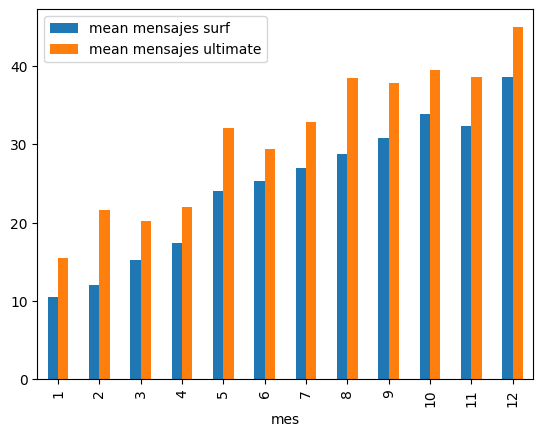

In [180]:
#promedio de mensajes por cada mes y plan
surf_promedio_mensajes=surf_plan.pivot_table(values="total de mensajes",index="mes" ,aggfunc="mean").rename(columns={"total de mensajes":"mean mensajes surf"})
ultimate_promedio_mensajes=ultimate_plan.pivot_table(values="total de mensajes",index="mes" ,aggfunc="mean").rename(columns={"total de mensajes":"mean mensajes ultimate"})
mensajes_promedio_plan=pd.merge(surf_promedio_mensajes,ultimate_promedio_mensajes, on="mes").reset_index()
mensajes_promedio_plan.plot(x="mes", kind="bar")
plt.show()


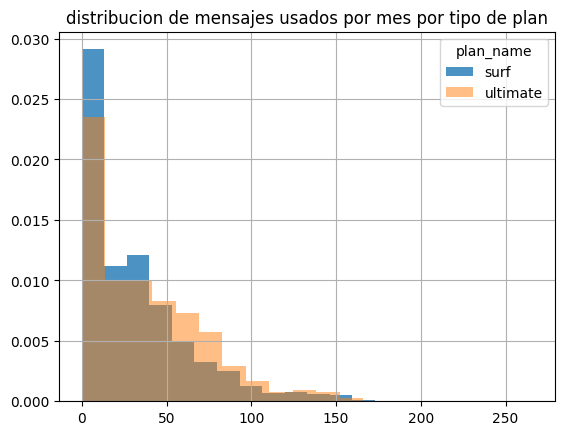

In [181]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_mensaje=surf_plan["total de mensajes"]
ultimate_mensaje=ultimate_plan["total de mensajes"]
surf_mensaje.hist(label="surf", density=True,alpha=0.8, bins=20)# el numero de bin se adecuao el numero de bloques para comparan bien
ultimate_mensaje.hist(label="ultimate", density=True, alpha=0.5, bins=12)
plt.legend(title="plan_name")
plt.title("distribucion de mensajes usados por mes por tipo de plan")
plt.show()


<AxesSubplot:xlabel='total de mensajes'>

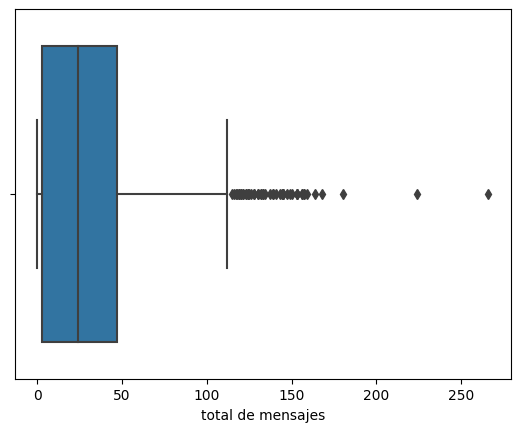

In [182]:
sns.boxplot(surf_mensaje)

<AxesSubplot:xlabel='total de mensajes'>

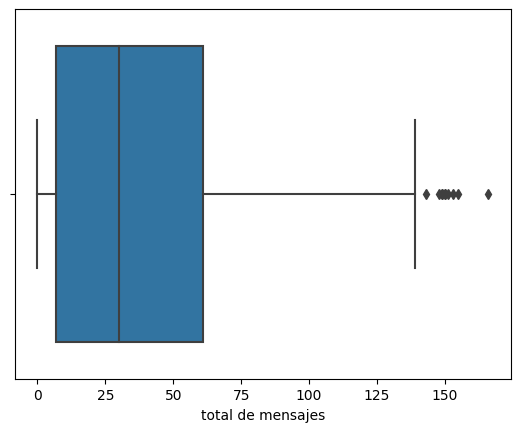

In [183]:
sns.boxplot(ultimate_mensaje)

In [184]:
surf_mensaje.describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: total de mensajes, dtype: float64

In [185]:
ultimate_mensaje.describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: total de mensajes, dtype: float64

In [186]:
np.var(ultimate_mensaje)

1207.0779147376543

In [187]:
np.var(surf_mensaje)

1126.008231726662

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Segun el grafico de barras el promedio por mes estan de forma ascedente pero los promedio de cada plan es diferente.
El promedio por mes de los usuarios de ultimate cada mes gastaron mas que los usuarios de surf pero la variacion es pequeña.Podemos notar en su varianza de los valores de minutos.
Detalle observado del histograma que no se genero ingreso extra en los usuarios de ultimate por que no conusmieron en su totalidad.
En cambio con respecto a los usuarios del plan surf se genera un ingreso extra.
hay usuarios de surf que usaron mas mensajes que el numero maximo de mensaje que usaron los usuarios de ultimate.
No hay mucha diferencia en los mensajes de cada plan. 


### Internet

<Figure size 800x1000 with 0 Axes>

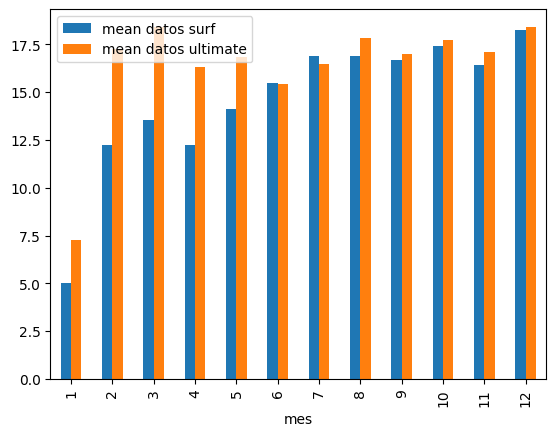

In [188]:
# comparacion de datos del promedio por plan y por mes
surf_promedio_datos=surf_plan.pivot_table(values="total de datos en gb",index="mes" ,aggfunc="mean").rename(columns={"total de datos en gb":"mean datos surf"})
ultimate_promedio_datos=ultimate_plan.pivot_table(values="total de datos en gb",index="mes" ,aggfunc="mean").rename(columns={"total de datos en gb":"mean datos ultimate"})
datos_promedio_plan=pd.merge(surf_promedio_datos,ultimate_promedio_datos, on="mes").reset_index()
plt.figure(figsize=(8,10))
datos_promedio_plan.plot(x="mes", kind="bar")
plt.show()

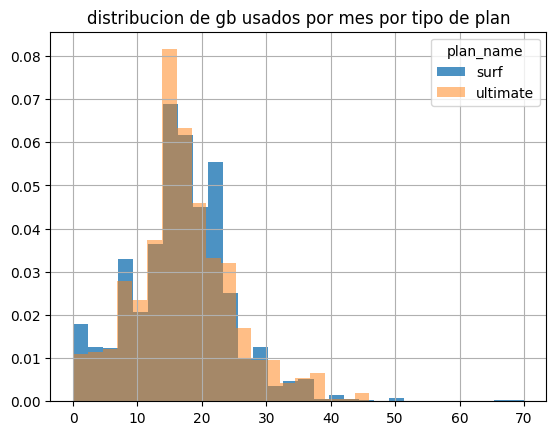

In [189]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_datos=surf_plan["total de datos en gb"]
ultimate_datos=ultimate_plan["total de datos en gb"]
surf_datos.hist(label="surf", density=True,alpha=0.8, bins=30)
ultimate_datos.hist(label="ultimate", density=True, alpha=0.5, bins=20)
plt.legend(title="plan_name")
plt.title("distribucion de gb usados por mes por tipo de plan")
plt.show()

In [190]:
surf_datos.describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: total de datos en gb, dtype: float64

<AxesSubplot:xlabel='total de datos en gb'>

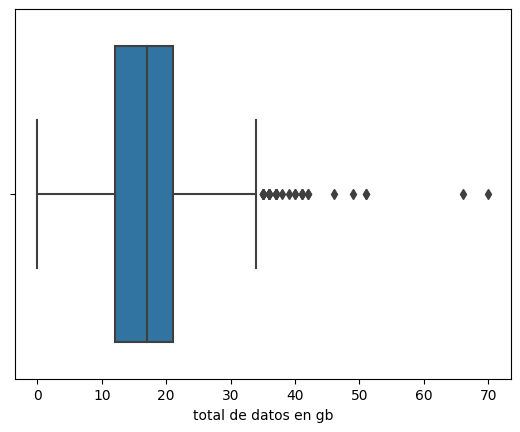

In [191]:
sns.boxplot(surf_datos)

In [192]:
ultimate_datos.describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: total de datos en gb, dtype: float64

<AxesSubplot:xlabel='total de datos en gb'>

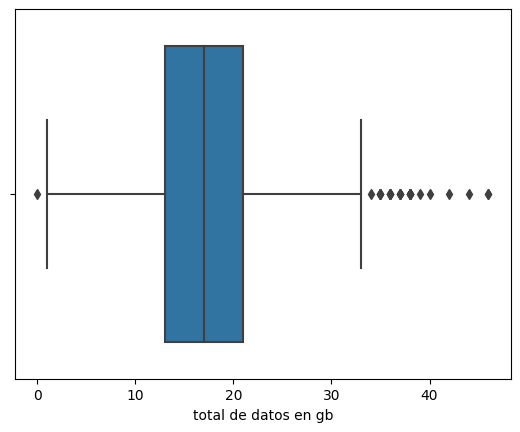

In [193]:
sns.boxplot(ultimate_datos)

In [194]:
np.var(ultimate_datos)

58.748840663580246

In [195]:
np.var(surf_datos)

61.54444942447023

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

con respecto al grafico de barras los promedios mensajes por cada mes con respecto a plan utimate no varia mucho los datos usados excepto en el mes de enero en cambio en caso de usuario del surf fueron utilizando de forma ascedente.
Con respecto al histrograma y caja 
Histogramas detalle:
1.La mayor parte del numero de usuario del plan de surf usaron mas de 15 gb, el cual gnera mayor ingreso por exceso del plan(15gb)  
2.Tambien hay un numero pequeño de usuario de ultimate que utilizaron mas de 30 gb pero el ingreso por exceso es poco.
caja detalle:
1.Ambos plan tienes usuarios que utilizaron mas del plan de gb
2.hay mayor numero de usuario del plan surf que utilizaron mas de 35 gb
los cantidad de gb usados el plan surf tiene mayor dispersion que los de ultimate. 


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<Figure size 800x1000 with 0 Axes>

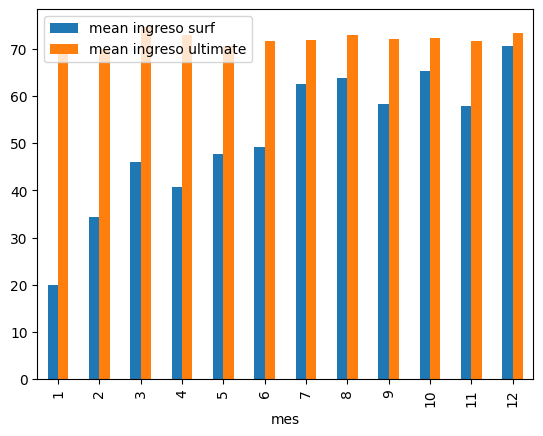

In [196]:
surf_promedio_ingreso=surf_plan.pivot_table(values="ingreso_mensual",index="mes" ,aggfunc="mean").rename(columns={"ingreso_mensual":"mean ingreso surf"})
ultimate_promedio_ingreso=ultimate_plan.pivot_table(values="ingreso_mensual",index="mes" ,aggfunc="mean").rename(columns={"ingreso_mensual":"mean ingreso ultimate"})
datos_promedio_plan=pd.merge(surf_promedio_ingreso,ultimate_promedio_ingreso, on="mes").reset_index()
plt.figure(figsize=(8,10))
datos_promedio_plan.plot(x="mes", kind="bar")
plt.show()

In [197]:
total_consumo_plan.query('plan_id=="surf"')["ingreso_mensual"].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: ingreso_mensual, dtype: float64

<AxesSubplot:xlabel='ingreso_mensual'>

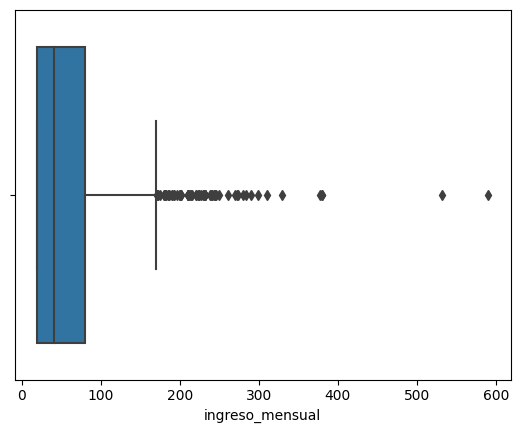

In [198]:
sns.boxplot(total_consumo_plan.query('plan_id=="surf"')["ingreso_mensual"])

In [199]:
total_consumo_plan.query("plan_id=='ultimate'")["ingreso_mensual"].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: ingreso_mensual, dtype: float64

<AxesSubplot:xlabel='ingreso_mensual'>

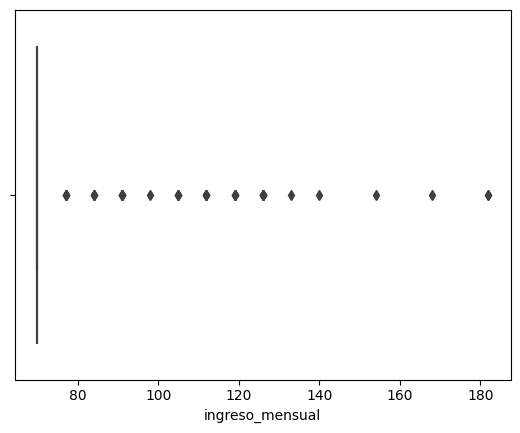

In [200]:
sns.boxplot(total_consumo_plan.query('plan_id=="ultimate"')["ingreso_mensual"])

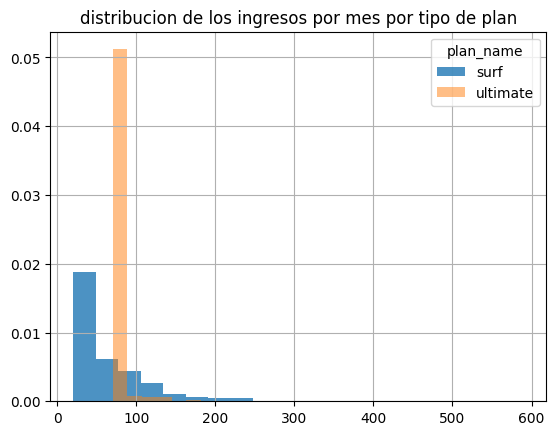

In [201]:
surf_ingresos=surf_plan["ingreso_mensual"]
ultimate_ingresos=ultimate_plan["ingreso_mensual"]
surf_ingresos.hist(label="surf", density=True,alpha=0.8, bins=20)
ultimate_ingresos.hist(label="ultimate", density=True, alpha=0.5, bins=6)
plt.legend(title="plan_name")
plt.title("distribucion de los ingresos por mes por tipo de plan")
plt.show()

In [202]:
np.var(surf_ingresos)# verificar la variamza para ver que tan dispersons estan los valores

3065.8848438690247

In [203]:
np.var(ultimate_ingresos)

129.66814043209877

Hay una diferencia en las varianzas de gb usados por el cual hay una dispersion grande y los valores estan mas alejados que el promedio.Esto se debe por datos y mensajes y minutos de llamadas.

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Con respecto al Histograma la mayor parte de los usuario de ultimate gastaron un promedio de 70 dolares
Con respecto a la caja se ve estos detalles:
los usuarios que gastan mas y consumen son los del plan surf ya que hay algunos que estan dentro de los valores atipico.
inclusive se ve que hay mayor dispersion de los ingresos los usuarios del plan surf y se ve que hay una diferencia con los ultimate.


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [204]:
# Prueba las hipótesis
#hipotesis nula : ingresos promedio ultimate = ingresos promedio surf
#hipoteis alternativa: ingresos promedio ultimate es difernte ingreso promedio surf
muestra_surf_ingreso=total_consumo_plan.query('plan_id=="surf"')["ingreso_mensual"]
muestra_ultimate_ingreso=total_consumo_plan.query('plan_id=="ultimate"')["ingreso_mensual"]
alpha= 0.05
result= st.ttest_ind(muestra_surf_ingreso,muestra_ultimate_ingreso, equal_var=False)
print("valor p:",result.pvalue)
if (result.pvalue < alpha):
    print ("rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")

valor p: 3.1703905481135734e-15
rechazamos la hipotesis nula


se comprueba que los promedios por usuario de cada plan no son iguales

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [205]:
# Prueba las hipótesis
total_consumo_plan[total_consumo_plan["city"].str.contains("New York")]["city"].unique()# identificar que ciudad tomar para filtar la ciudad

array(['New York-Newark-Jersey City, NY-NJ-PA MSA'], dtype=object)

In [206]:
ny_nj_zone=['New York-Newark-Jersey City, NY-NJ-PA MSA',]

In [207]:
# hipotesis nula: ingreso promedio de los usuarios del área NY-NJ es IGUAL a los usuarios de otras regiones
# hipotesis alternativa : ingreso promedio de los usuarios del área NY-NJ es DIFERENTE a los usuarios de otras regiones
muestra_city_ingreso=total_consumo_plan[total_consumo_plan["city"].isin(ny_nj_zone)]["ingreso_mensual"]
muestra_city_otros=total_consumo_plan[~total_consumo_plan["city"].isin(ny_nj_zone)]["ingreso_mensual"]
alpha=0.05
result_city=st.ttest_ind(muestra_city_ingreso,muestra_city_otros,equal_var=False)
print("valor p:",result_city.pvalue)
if (result_city.pvalue<alpha):
    print ("rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")

valor p: 0.0335256158853001
rechazamos la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Puntos importantes:
#Obervacion
#1.Se pudo notar que tienen diferentes numero de usuarios en surf y ultimate
#2.los numero usuarios de Surf es mayor al numero de usuario de ultimate
#3.En comparacion quien genera mas ingreso es evidente que el plan surf genera mas ingreso y no por el numero de usuario ya que promedio del ingreso por usuario se ha incrementado  
#4.El promedio de ingreso por usuario del surf es menor que el promedio de ingreso por usuario de ultimate, pero estadisticamente al tener mayor numero de usuario que gasta mas minutos y sms y datos afecta enormemente en el promedio del ingreso surf por usuario. 
#5.El motivo de que el promedio de ingreso por usuario_surf aumenta, es que los usuarios surf gastan mas gb que los usuarios de ultimate y eso sube su ingreso y por ende el promedio de ingreso por usuario por afecta en general 
#6. Con relacion a las llamadas y mensajes de los usuarios surf gasta mas que los de ultimate y al ver mayor numeros de usuarios en ese plan beneficia mucho
En conclusion:
el plan surf genera mayor rentabilidad
#Me beneficia mayor el plan surf pero recomendaria que se pasen estos usuarios(los que generan mayor ingreso al plan surf)a pasarse al plan ultimate